In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") # establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_theme(style="dark") # cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros.
sns.set_palette('twilight')
#plt.style.use('Solarize_Light2')# establece el estilo en Solarize_Lihgt2.

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("raw_data_final_20231212.csv", index_col = 0 ) 
df.head()

,Age,Attrition,Businesstravel,Department,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Dailyrate,Distancefromhome,Monthlyincome,Performancerating,Totalworkingyears,Worklifebalance,Hourlyrate
0,51,No,Unknown,Research & Development,3,Unknown,162,Not Satisfied,Male,High,Executive,Research Director,Satisfied,Unknown,6462,7,No,13,Satisfied,0,5,20,15,15,1972,Yes,684.0,6.0,19537.0,3.0,13.6,3.0,51.0
1,52,No,Unknown,Unknown,4,Life Sciences,259,Satisfied,Male,Moderate,Executive,Manager,Satisfied,Unknown,5678,0,Unknown,14,Not Satisfied,1,5,33,11,9,1971,Yes,699.0,1.0,19999.0,3.0,34.0,3.0,65.0
2,42,No,travel_rarely,Research & Development,2,Technical Degree,319,Satisfied,Male,High,Executive,Manager,Very Satisfied,Married,4933,1,No,11,Very Satisfied,0,3,22,11,15,1981,Yes,532.0,4.0,19232.0,3.0,22.0,3.0,58.0
3,47,No,travel_rarely,Research & Development,4,Medical,2069,Not Satisfied,Female,High,Senior,Research Director,Satisfied,Married,26703,3,Unknown,19,Somewhat Satisfied,2,2,20,5,6,1976,No,359.0,2.0,17169.0,3.0,11.2,1.8,82.0
4,46,No,Unknown,Sales,3,Technical Degree,2070,Not Satisfied,Female,Very High,Senior,Sales Executive,Not Satisfied,Divorced,7739,2,No,12,Very Satisfied,1,5,19,2,8,1977,No,1319.0,3.0,4884.6,3.0,13.4,3.0,45.0


# GRÁFICOS PRESENTACIÓN BBDD 

### Distribución de edades por género

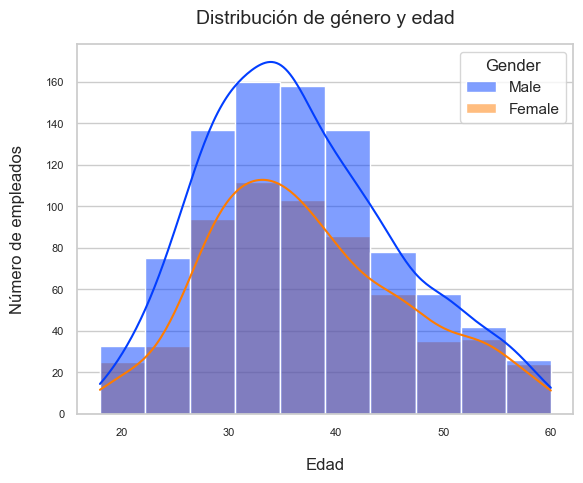

In [26]:
sns.histplot(x = "Age", 
             data = df, 
             hue = 'Gender',
             kde = True,
             palette="bright", 
             bins = 10)

plt.grid(False)
plt.xlabel('Edad', labelpad=15, fontsize=12)
plt.ylabel('Número de empleados', labelpad=15, fontsize=12),
plt.xticks(fontsize=8),
plt.yticks(fontsize=8),
plt.grid(axis='y')
plt.title('Distribución de género y edad', pad=15, fontsize=14);


### Job level distribution

In [5]:
df_joblevel = df.groupby("Joblevel")["Employeenumber"].count().reset_index()
df_joblevel

,Joblevel,Employeenumber
0,Entry-level,555
1,Executive,70
2,Junior,546
3,Mid-level,228
4,Senior,111


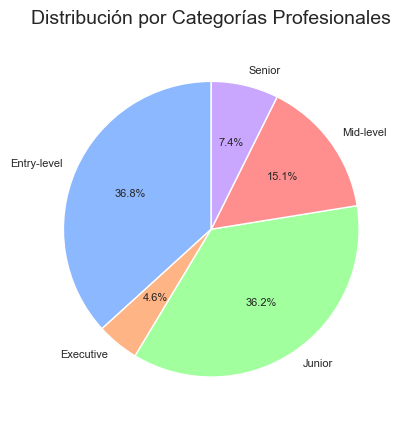

In [6]:
colores = ['#8cb8ff','#ffb485','#a2ff9e','#ff8f8f','#c9a7ff','#c3a595','#ffafff','#b9b9b9','#d9e084','#a4e7eb']

plt.pie("Employeenumber", labels= "Joblevel",
        data = df_joblevel, 
        autopct=  '%1.1f%%', 
        colors= colores, 
        textprops={'fontsize': 8}, 
        startangle=90)

plt.title('Distribución por Categorías Profesionales', pad=15, fontsize=14); 

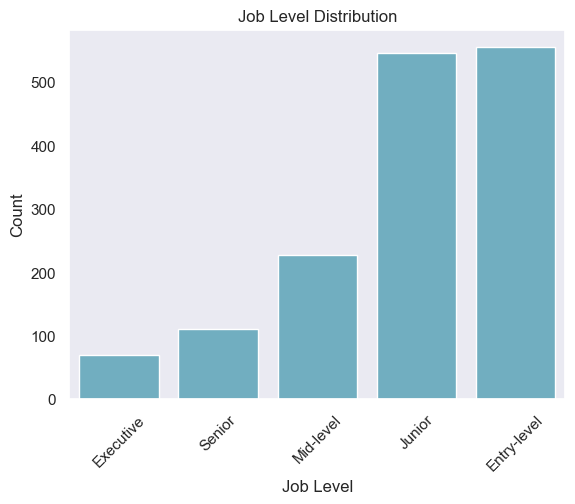

In [7]:
sns.countplot(x = "Joblevel", 
              data = df, 
              color = "c");

plt.xticks(rotation = 45)
plt.xlabel("Job Level")
plt.ylabel("Count")
plt.title("Job Level Distribution");


### Education level distribution 

In [8]:
def education_level(dataframe):
    dict_map = {1: "Elementary School", 2: "Middle School", 3: "High School", 4: "College/University", 5: "Graduate School"}
    dataframe["Education"] = dataframe["Education"].map(dict_map)
    return dataframe
df= education_level(df)

In [9]:
df["Education"].value_counts()

Education
High School           585
College/University    411
Middle School         293
Elementary School     172
Graduate School        49
Name: count, dtype: int64

In [10]:
df_educacion = df.groupby("Education")["Employeenumber"].count().reset_index()
df_educacion

,Education,Employeenumber
0,College/University,411
1,Elementary School,172
2,Graduate School,49
3,High School,585
4,Middle School,293


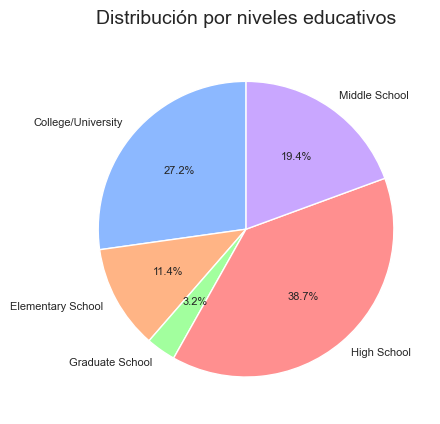

In [11]:
sns.set(style="whitegrid")
colores = [
    '#8cb8ff',
    '#ffb485',
    '#a2ff9e',
    '#ff8f8f',
    '#c9a7ff',
    '#c3a595',
    '#ffafff',
    '#b9b9b9',
    '#d9e084',
    '#a4e7eb'
]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("Employeenumber", labels= "Education",
        data = df_educacion, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90)
plt.title('Distribución por niveles educativos', pad=15, fontsize=14); 


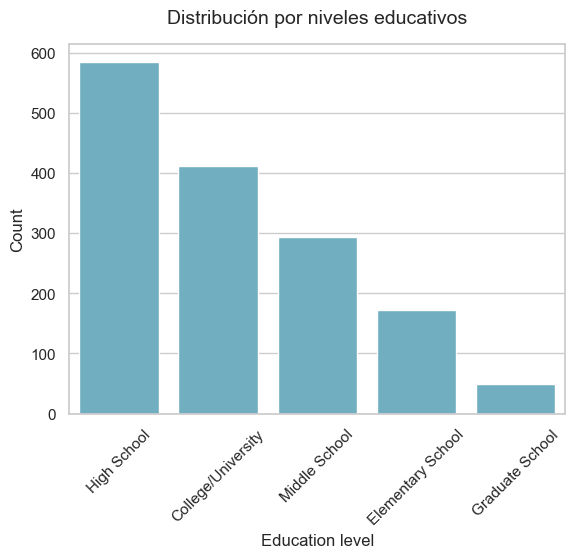

In [12]:
sns.countplot(x = "Education", 
              data = df, 
              color = "c");


plt.xlabel("Education level")
plt.ylabel("Count")
plt.title("Education Level Distribution")
plt.xticks(rotation=45)

plt.title('Distribución por niveles educativos', pad=15, fontsize=14); 

# GRÁFICOS EN BASE a vars que no hacemos en el AB testing

In [13]:
df.head()

,Age,Attrition,Businesstravel,Department,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Dailyrate,Distancefromhome,Monthlyincome,Performancerating,Totalworkingyears,Worklifebalance,Hourlyrate
0,51,No,Unknown,Research & Development,High School,Unknown,162,Not Satisfied,Male,High,Executive,Research Director,Satisfied,Unknown,6462,7,No,13,Satisfied,0,5,20,15,15,1972,Yes,684.0,6.0,19537.0,3.0,13.6,3.0,51.0
1,52,No,Unknown,Unknown,College/University,Life Sciences,259,Satisfied,Male,Moderate,Executive,Manager,Satisfied,Unknown,5678,0,Unknown,14,Not Satisfied,1,5,33,11,9,1971,Yes,699.0,1.0,19999.0,3.0,34.0,3.0,65.0
2,42,No,travel_rarely,Research & Development,Middle School,Technical Degree,319,Satisfied,Male,High,Executive,Manager,Very Satisfied,Married,4933,1,No,11,Very Satisfied,0,3,22,11,15,1981,Yes,532.0,4.0,19232.0,3.0,22.0,3.0,58.0
3,47,No,travel_rarely,Research & Development,College/University,Medical,2069,Not Satisfied,Female,High,Senior,Research Director,Satisfied,Married,26703,3,Unknown,19,Somewhat Satisfied,2,2,20,5,6,1976,No,359.0,2.0,17169.0,3.0,11.2,1.8,82.0
4,46,No,Unknown,Sales,High School,Technical Degree,2070,Not Satisfied,Female,Very High,Senior,Sales Executive,Not Satisfied,Divorced,7739,2,No,12,Very Satisfied,1,5,19,2,8,1977,No,1319.0,3.0,4884.6,3.0,13.4,3.0,45.0


In [14]:
df.columns

Index(['Age', 'Attrition', 'Businesstravel', 'Department', 'Education',
       'Educationfield', 'Employeenumber', 'Environmentsatisfaction', 'Gender',
       'Jobinvolvement', 'Joblevel', 'Jobrole', 'Jobsatisfaction',
       'Maritalstatus', 'Monthlyrate', 'Numcompaniesworked', 'Overtime',
       'Percentsalaryhike', 'Relationshipsatisfaction', 'Stockoptionlevel',
       'Trainingtimeslastyear', 'Yearsatcompany', 'Yearssincelastpromotion',
       'Yearswithcurrmanager', 'Datebirth', 'Remotework', 'Dailyrate',
       'Distancefromhome', 'Monthlyincome', 'Performancerating',
       'Totalworkingyears', 'Worklifebalance', 'Hourlyrate'],
      dtype='object')

In [15]:
mediana_salario_hombres = df[df['Gender'] == 'Male']['Monthlyincome'].median()
mediana_salario_mujeres = df[df['Gender'] == 'Female']['Monthlyincome'].median()

In [16]:
mediana_salario_hombres = df[df['Gender'] == 'Male']['Monthlyincome'].median()
mediana_salario_mujeres = df[df['Gender'] == 'Female']['Monthlyincome'].median()
print(f"La mediana de salario para hombres es: {mediana_salario_hombres}")
print(f"La mediana de salario para mujeres es: {mediana_salario_mujeres}")

La mediana de salario para hombres es: 5336.2
La mediana de salario para mujeres es: 5496.0


NEXT STEPS -- EXTRA a compara aparte de los requisitos: 

- Satisfiacción con el trabajo (Jobsatisfaction) 
- Environment satisfaction 

Relación salario y años en la compañia

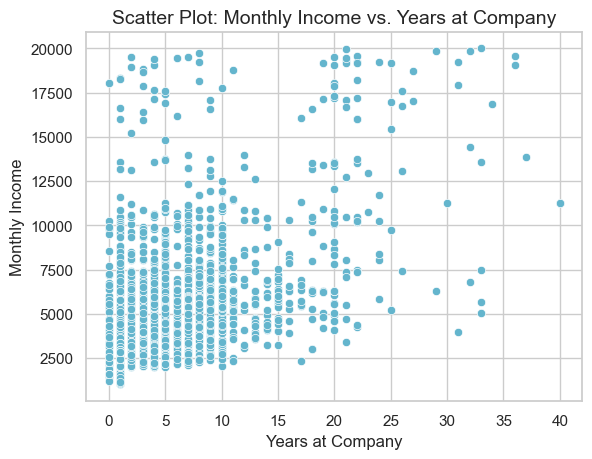

In [17]:
sns.scatterplot(x="Yearsatcompany", y="Monthlyincome", data=df, color="c")

# Cambia las etiquetas de los ejes
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Monthly Income", fontsize=12)

plt.title('Scatter Plot: Monthly Income vs. Years at Company', fontsize=14)

plt.show()

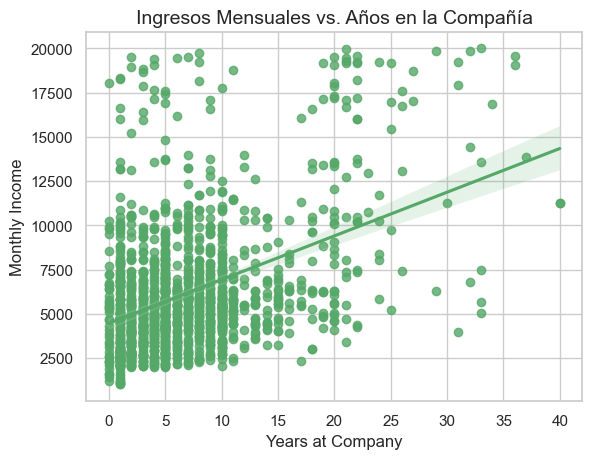

In [18]:
sns.regplot(x="Yearsatcompany", y="Monthlyincome", data=df, color="g")

# Cambia las etiquetas de los ejes
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Monthly Income", fontsize=12)

plt.title('Ingresos Mensuales vs. Años en la Compañía', fontsize=14)

plt.show()

Comparamos años en la compañia y "rango" laboral

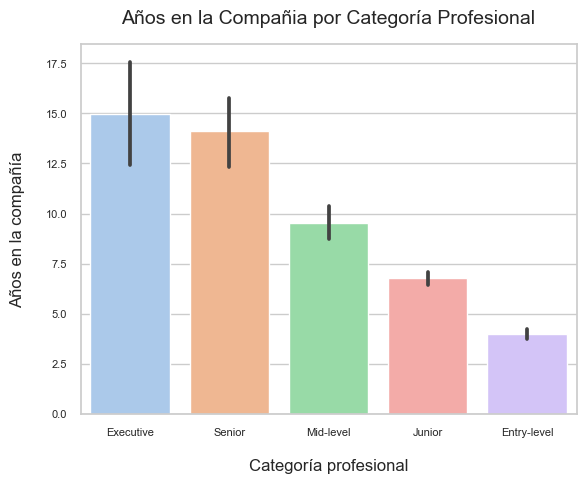

In [25]:
sns.barplot(x = "Joblevel",
            y = "Yearsatcompany",
            palette= "pastel",
            data = df)

plt.title('Años en la Compañia por Categoría Profesional', fontsize=14, pad=15)
plt.xlabel("Categoría profesional", fontsize=12, labelpad=15)
plt.ylabel("Años en la compañía", fontsize=12, labelpad=15)
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8);

In [ ]:
df.groupby("Joblevel")["Yearsatcompany"].mean()

Joblevel
Entry-level     3.985586
Executive      14.985714
Junior          6.780220
Mid-level       9.526316
Senior         14.099099
Name: Yearsatcompany, dtype: float64

## SATISFACTIONS NO NOS APORTABAN NADA INTERESANTE

In [ ]:
media_por_grupo = df.groupby(["Joblevel", "Jobsatisfaction"]).mean()
media_por_grupo

In [ ]:
satisfaccion_filtrada = df[df['Jobsatisfaction'].isin(['Satisfied', 'Very Satisfied'])]
grupo_por_joblevel = satisfaccion_filtrada.groupby('Joblevel').size()
print(grupo_por_joblevel)

Joblevel
Entry-level    336
Executive       43
Junior         342
Mid-level      140
Senior          64
dtype: int64


In [ ]:
satisfaccion_filtrada2 = df[df['Jobsatisfaction'].isin(['Somewhat Satisfied', 'Not Satisfied'])]
grupo_por_joblevel = satisfaccion_filtrada2.groupby('Joblevel').size()
print(grupo_por_joblevel)

Joblevel
Entry-level    219
Executive       27
Junior         204
Mid-level       88
Senior          47
dtype: int64


In [ ]:
df[df["Jobsatisfaction"]=="Very Satisfied"]

,Age,Attrition,Businesstravel,Department,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Dailyrate,Distancefromhome,Monthlyincome,Performancerating,Totalworkingyears,Worklifebalance,Hourlyrate
2,42,No,travel_rarely,Research & Development,Middle School,Technical Degree,319,Satisfied,Male,High,Executive,Manager,Very Satisfied,Married,4933,1,No,11,Very Satisfied,0,3,22,11,15,1981,Yes,532.0,4.0,19232.0,3.0,22.0,3.0,58.0
5,48,No,Unknown,Research & Development,High School,Medical,1900,Very Satisfied,Female,High,Senior,Manager,Very Satisfied,Unknown,2437,3,No,11,Somewhat Satisfied,1,3,22,4,7,1975,Yes,117.0,22.0,17174.0,3.0,14.4,3.0,58.0
21,33,No,Unknown,Research & Development,Middle School,Life Sciences,73,Not Satisfied,Female,High,Mid-level,Research Director,Very Satisfied,Single,15146,1,Yes,12,Satisfied,0,1,15,8,12,1990,Yes,515.0,1.0,5537.6,3.0,15.0,3.0,98.0
23,47,No,Unknown,Unknown,Middle School,Other,820,Satisfied,Female,High,Senior,Manager,Very Satisfied,Married,12982,1,Unknown,11,Satisfied,1,3,26,3,0,1976,No,202.0,2.0,16752.0,3.0,14.0,2.0,33.0
24,36,No,travel_rarely,Sales,Middle School,Life Sciences,2079,Very Satisfied,Male,High,Junior,Sales Executive,Very Satisfied,Unknown,2823,1,Unknown,14,Very Satisfied,1,1,18,4,11,1987,Yes,928.0,10.2,6201.0,3.0,18.0,3.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,55,Yes,Unknown,Sales,Elementary School,Medical,842,Satisfied,Male,High,Junior,Sales Executive,Very Satisfied,Single,21519,4,Unknown,16,Satisfied,0,3,9,7,3,1968,Yes,436.0,2.0,7416.2,3.0,16.8,2.0,37.0
1604,41,Yes,Unknown,Research & Development,College/University,Life Sciences,927,Somewhat Satisfied,Female,Low,Entry-level,Laboratory Technician,Very Satisfied,Divorced,17725,4,Yes,13,Satisfied,1,1,7,1,0,1982,Yes,1085.0,2.0,12335.8,3.0,20.6,2.0,63.8
1607,31,No,Unknown,Research & Development,High School,Medical,2497,Very Satisfied,Female,High,Junior,Healthcare Representative,Very Satisfied,Unknown,17369,0,Unknown,11,Satisfied,2,2,9,8,5,1992,Yes,616.0,12.0,5665.2,3.0,10.0,1.0,41.0
1609,36,Yes,travel_rarely,Sales,Elementary School,Life Sciences,967,Satisfied,Male,Moderate,Mid-level,Sales Executive,Very Satisfied,Married,5518,1,Unknown,11,Not Satisfied,1,6,16,3,7,1987,No,530.0,3.0,10325.0,3.4,16.8,3.0,51.0


Satisfacción y joblevel

/var/folders/np/2h53vflx42jd3w_yxn33bvv40000gn/T/ipykernel_4076/3498585636.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jobsatisfaction', data=df, palette='viridis')


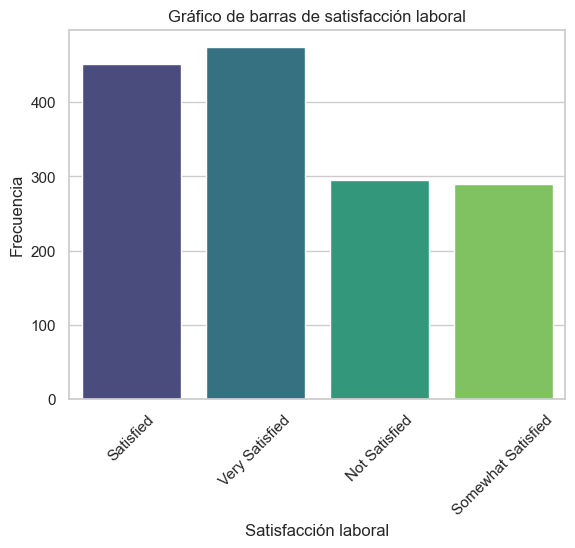

In [ ]:
sns.countplot(x='Jobsatisfaction', data=df, palette='viridis') 
plt.title('Gráfico de barras de satisfacción laboral')
plt.xlabel('Satisfacción laboral')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show();

In [ ]:
df["Department"].value_counts()

Research & Development    945
Sales                     425
Unknown                    86
Human Resources            54
Name: Department, dtype: int64

In [ ]:
df.head(1)

,Age,Attrition,Businesstravel,Department,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Dailyrate,Distancefromhome,Monthlyincome,Performancerating,Totalworkingyears,Worklifebalance,Hourlyrate
0,51,No,Unknown,Research & Development,High School,Unknown,162,Not Satisfied,Male,High,Executive,Research Director,Satisfied,Unknown,6462,7,No,13,Satisfied,0,5,20,15,15,1972,Yes,684.0,6.0,19537.0,3.0,13.6,3.0,51.0


In [ ]:

df_grapghic_1 = df[["Attrition", "Jobsatisfaction"]]
df_grapghic_1

,Attrition,Jobsatisfaction
0,No,Satisfied
1,No,Satisfied
2,No,Very Satisfied
3,No,Satisfied
4,No,Not Satisfied
...,...,...
1609,Yes,Very Satisfied
1610,No,Somewhat Satisfied
1611,No,Satisfied
1612,No,Very Satisfied


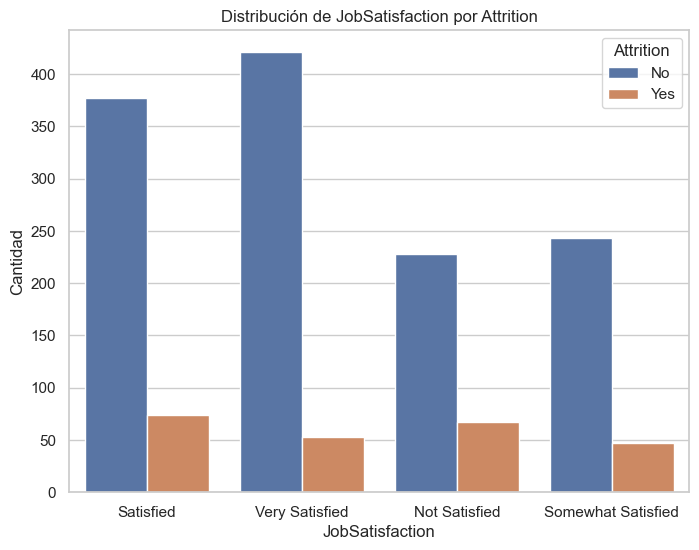

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Jobsatisfaction', hue='Attrition', data=df)
plt.title('Distribución de JobSatisfaction por Attrition')
plt.xlabel('JobSatisfaction')
plt.ylabel('Cantidad')
plt.legend(title='Attrition', loc='upper right')
plt.show()

In [ ]:
rotacion_yes = df_grapghic_1['Attrition'] == 'Yes'].value_counts()/df_grapghic_1.shape[0]*100

Attrition
No     84.039735
Yes    15.960265
Name: count, dtype: float64

In [ ]:
rotacion_yes = df_grapghic_1[df_grapghic_1['Attrition'] == 'Yes'].value_counts()/df_grapghic_1[df_grapghic_1['Attrition'] == 'Yes'].shape[0]*100
rotacion_yes

Attrition  Jobsatisfaction   
Yes        Satisfied             30.705394
           Not Satisfied         27.800830
           Very Satisfied        21.991701
           Somewhat Satisfied    19.502075
Name: count, dtype: float64

In [ ]:
rotation_no = df_grapghic_1[df_grapghic_1['Attrition'] == 'No'].value_counts()/df_grapghic_1[df_grapghic_1['Attrition'] == 'No'].shape[0]*100
rotation_no

Attrition  Jobsatisfaction   
No         Very Satisfied        33.175729
           Satisfied             29.708432
           Somewhat Satisfied    19.148936
           Not Satisfied         17.966903
Name: count, dtype: float64

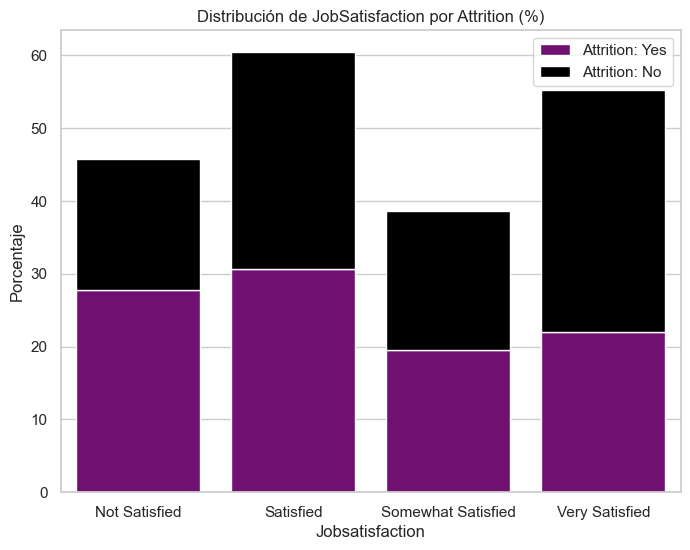

In [ ]:

table = pd.crosstab(df['Attrition'], df['Jobsatisfaction'], normalize='index') * 100

# Gráfico de barras con porcentajes
plt.figure(figsize=(8, 6))
sns.barplot(x=table.columns, y=table.loc['Yes'], color='purple', label='Attrition: Yes')
sns.barplot(x=table.columns, y=table.loc['No'], color='black', bottom=table.loc['Yes'], label='Attrition: No')
plt.title('Distribución de JobSatisfaction por Attrition (%)')
plt.xlabel('Jobsatisfaction')
plt.ylabel('Porcentaje')
plt.legend()
plt.show()



En este gráfico de barras apiladas:

1. **Eje X (JobSatisfaction):** Representa los distintos niveles de satisfacción laboral que pueden tener los empleados (por ejemplo, insatisfecho, algo satisfecho, satisfecho, muy satisfecho).

2. **Eje Y (Porcentaje):** Indica el porcentaje de empleados que pertenecen a cada nivel de satisfacción laboral. El eje Y muestra los porcentajes totales de empleados según su nivel de satisfacción.

El gráfico está dividido por colores:

- **Rojo (Attrition: Yes):** Representa el porcentaje de empleados que se han ido (han tenido rotación) y que pertenecen a cada nivel de satisfacción laboral.
  
- **Azul (Attrition: No):** Muestra el porcentaje de empleados que no han tenido rotación y su distribución según los diferentes niveles de satisfacción laboral.

Las barras rojas (Attrition: Yes) comienzan desde el 0% en el eje Y y muestran el porcentaje de empleados que se fueron (Attrition: Yes) para cada nivel de satisfacción. Las barras azules (Attrition: No) se apilan encima de las barras rojas y representan el porcentaje de empleados que no se fueron (Attrition: No) para cada nivel de satisfacción.

Este gráfico permite comparar visualmente cómo se distribuye cada nivel de satisfacción laboral entre los empleados que se fueron y los que permanecieron en la empresa. Por ejemplo, podrías observar si los empleados con niveles más bajos de satisfacción tienen una propensión mayor a dejar la empresa en comparación con aquellos con niveles más altos de satisfacción.

### gráfico ultimo para enlazar con el AB testing anecdótico del final 

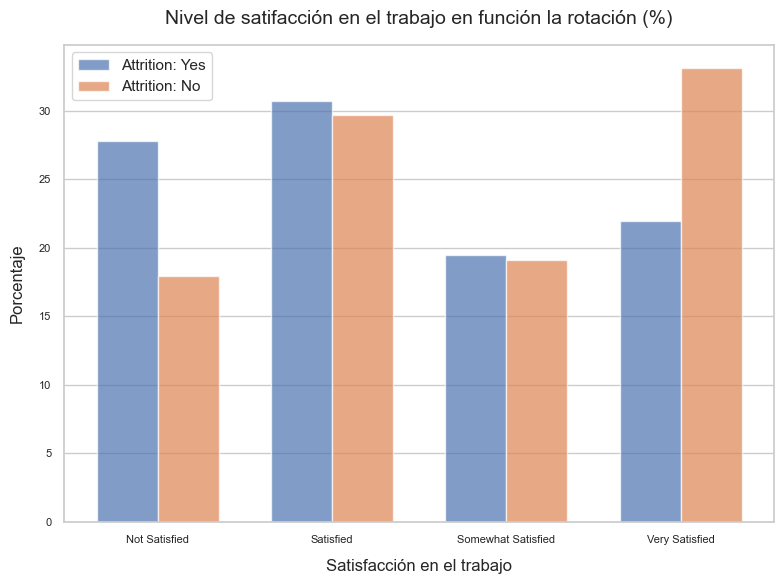

In [28]:

table = pd.crosstab(df['Attrition'], df['Jobsatisfaction'], normalize='index') * 100

# Transponer los datos para el gráfico de barras
table = table.T.reset_index()

# Obtener los índices para las barras
x = np.arange(len(table['Jobsatisfaction']))

# Ancho de las barras
bar_width = 0.35

# Gráfico de barras con barras una al lado de la otra
plt.figure(figsize=(8, 6))
plt.bar(x - bar_width/2, table['Yes'], width=bar_width, alpha=0.7, label='Attrition: Yes')
plt.bar(x + bar_width/2, table['No'], width=bar_width,  alpha=0.7, label='Attrition: No')

plt.xlabel('Satisfacción en el trabajo', fontsize=12, labelpad=10)
plt.ylabel('Porcentaje', fontsize=12, labelpad=10)
plt.title('Nivel de satifacción en el trabajo en función la rotación (%)', fontsize=14, pad=15)
plt.xticks(x, table['Jobsatisfaction'])
plt.yticks(fontsize=8)
plt.xticks(rotation=0, fontsize=8)
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


# Modificar la leyenda
#plt.legend(title='Nuevas Etiquetas', labels=['Etiqueta A', 'Etiqueta B'])


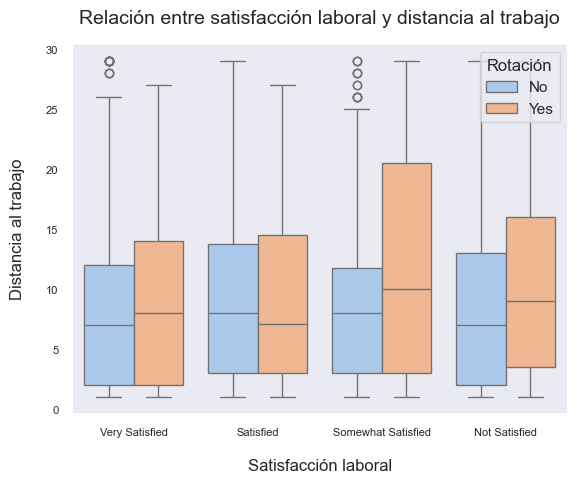

In [8]:
orden = ["Very Satisfied", "Satisfied", "Somewhat Satisfied", "Not Satisfied"]
sns.boxplot(data=df, y = "Distancefromhome", x = "Jobsatisfaction", hue= "Attrition", order= orden, palette="pastel")
plt.title('Relación entre satisfacción laboral y distancia al trabajo', fontsize=14, pad=15)
plt.xlabel("Satisfacción laboral", fontsize=12, labelpad=15)
plt.ylabel("Distancia al trabajo", fontsize=12, labelpad=15)
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)
# Personalizar la leyenda
plt.legend(title='Rotación', loc='upper right');

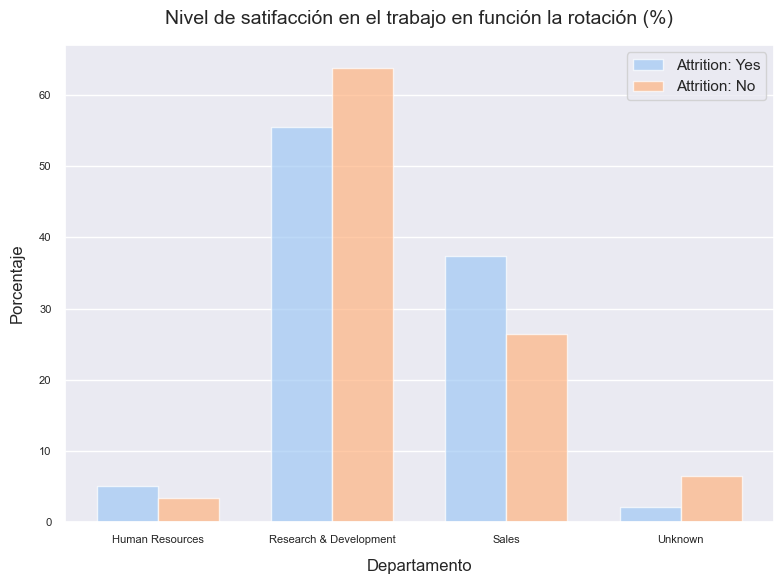

In [4]:

table = pd.crosstab(df['Attrition'], df['Department'], normalize='index') * 100

# Transponer los datos para el gráfico de barras
table = table.T.reset_index()

# Obtener los índices para las barras
x = np.arange(len(table['Department']))

# Ancho de las barras
bar_width = 0.35

colors = sns.color_palette("pastel")
# Gráfico de barras con barras una al lado de la otra
plt.figure(figsize=(8, 6))
plt.bar(x - bar_width/2, table['Yes'], width=bar_width, alpha=0.7, label='Attrition: Yes', color=colors[0])
plt.bar(x + bar_width/2, table['No'], width=bar_width,  alpha=0.7, label='Attrition: No', color=colors[1])

plt.xlabel('Departamento', fontsize=12, labelpad=10)
plt.ylabel('Porcentaje', fontsize=12, labelpad=10)
plt.title('Nivel de satifacción en el trabajo en función la rotación (%)', fontsize=14, pad=15)
plt.xticks(x, table['Department'])
plt.yticks(fontsize=8)
plt.xticks(rotation=0, fontsize=8)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
